<a href="https://colab.research.google.com/github/danielmpedrozo/russian_plate_ocr/blob/main/OCR_EasyOCR_Cascade_and_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
import cv2
from time import sleep
import imutils
from matplotlib import pyplot as plt
import easyocr
from torchvision import models
model = models.resnet50(weights='ResNet50_Weights.DEFAULT')


In [112]:
def haar_cascade_placa(img, plate):
    img_roi = img[plate[0][1]:plate[0][1] + plate[0][3], plate[0][0]: plate[0][0] + plate[0][2]]
    return img_roi
    

In [113]:
def pre_processing(gray_img):
  bfilter = cv2.bilateralFilter(gray_img, 11, 17, 17)
  edges = cv2.Canny(bfilter, 30, 200)
  thresh_img = cv2.threshold(edges, 127, 255, 0)[1]
  return thresh_img


In [114]:
def find_plate(img, thresh_img):
  keypoints = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
  for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
      location = approx
      break
  roi_img = img[location[0][0][1]:location[2][0][1], location[2][0][0]:location[0][0][0]]
  return [roi_img, approx]


In [115]:
def ocr_img(img_roi_binary):

  reader = easyocr.Reader(['en'])

  result = reader.readtext(img_roi_binary)
  
  for r in result:
    if len(r[-2]) == 7:
      text = r[-2]

  return text
  

In [116]:
# def tratamento_roi_img(img_roi):
#     img_roi_gray = cv2.cvtColor(img_roi, cv2.COLOR_BGR2GRAY)
#     bfilter = cv2.bilateralFilter(img_roi_gray, 11, 17, 17)
#     img_roi_binary = cv2.threshold(bfilter, 85, 255, cv2.THRESH_BINARY)[1]
#     img_roi_binary = cv2.resize(img_roi_binary, None, fx=2, fy=2)

#     return img_roi_binary


In [117]:

def draw_img(img, text, plate):
    font = cv2.FONT_HERSHEY_SIMPLEX
    for (x, y, w, h) in plate:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 6)
        cv2.putText(img, text=text, org=(x, y - 10), fontFace=font, fontScale=3, color=(0, 255, 0), thickness=6,
                    lineType=cv2.LINE_AA)
    return img


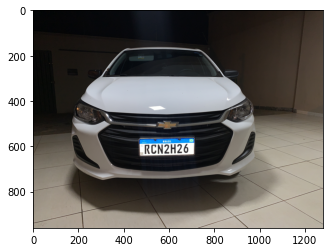

In [161]:
plate_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/PycharmProjects/russian_plate/haarcascade_russian_plate_number.xml')

frame = cv2.imread('/content/drive/MyDrive/PycharmProjects/russian_plate/car_images/IMG_4048 (1).png')

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


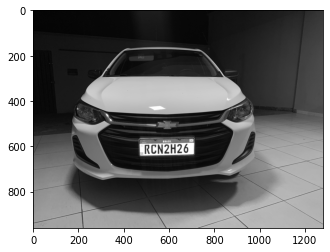

In [162]:
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

plate = plate_classifier.detectMultiScale(gray_frame, 1.1, 3)

plt.imshow(cv2.cvtColor(gray_frame, cv2.COLOR_BGR2RGB))


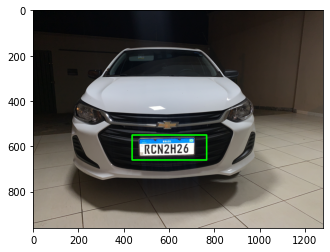

In [163]:
copy_frame = frame.copy()
for (x, y, w, h) in plate:
  cv2.rectangle(copy_frame, (x, y), (x + w, y + h), (0, 255, 0), 6)
plt.imshow(cv2.cvtColor(copy_frame, cv2.COLOR_BGR2RGB))


In [164]:
if len(plate) > 1:
  for rec in plate:
    rec = [rec]
    img_roi = haar_cascade_placa(frame, rec)
    
    thresh_frame = pre_processing(img_roi)
    
    try:
      contour_frame, loc = find_plate(img_roi, thresh_frame)
    except:
      continue
    else:
      plate = rec

else:
  img_roi = haar_cascade_placa(frame, plate)

  thresh_frame = pre_processing(img_roi)

  contour_frame, loc = find_plate(img_roi, thresh_frame)


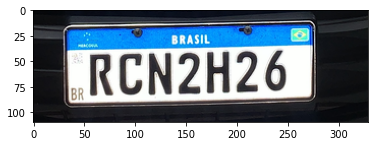

In [165]:
plt.imshow(cv2.cvtColor(img_roi, cv2.COLOR_BGR2RGB))


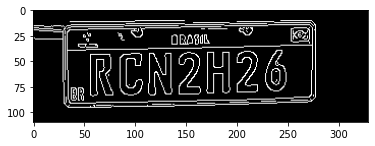

In [166]:
plt.imshow(cv2.cvtColor(thresh_frame, cv2.COLOR_BGR2RGB))


[[[274  35]]

 [[270  85]]

 [[ 34  87]]

 [[ 34  39]]]


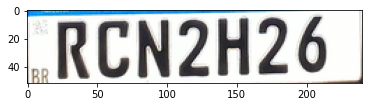

In [167]:
print(loc)
plt.imshow(cv2.cvtColor(contour_frame, cv2.COLOR_BGR2RGB))


In [168]:
text = ocr_img(contour_frame)
text


'RCN2H26'

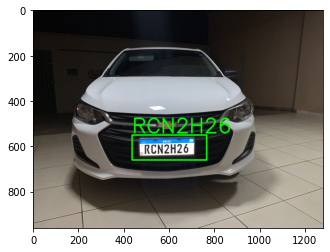

In [169]:
frame = draw_img(frame, text, plate)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
